In [1]:
# ติดตั้ง opencv package for python
# ใช้เวลาสักพัก ทำเพียงครั้งเดียว เพื่อติดตั้งลงบนเครื่อง 
#!pip install opencv-python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def show_image(img, title=None):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

### Detect face

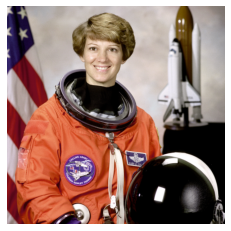

In [3]:
#โหลดรูปภาพ
from skimage import data

img_astro = data.astronaut()
show_image(img_astro)

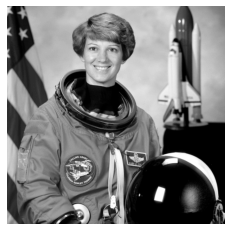

In [4]:
# แปลงรูป RGB -> grayscale
img_gray = cv2.cvtColor(img_astro, cv2.COLOR_RGB2GRAY) 
show_image(img_gray)

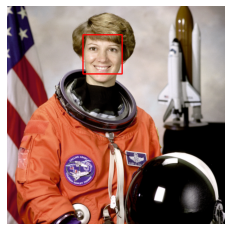

In [5]:
# โหลด trained classifer สำหรับตรวจจับหน้า ด้านหน้า
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# detect หน้าโดยใช้ detectMultiScale method
faces = face_detector.detectMultiScale(img_gray, scaleFactor=1.2, minSize=(60,60), maxSize=(120,120))

# วาดสีเหลี่ยมรอบหน้าที่เจอ
img_detected = img_astro.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_detected, (x,y), (x+w,y+h), (255,0,0), 2)
show_image(img_detected);

# แบบฝึกหัด
**Face detection รูปหมู่**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def show_image(img, title=None):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

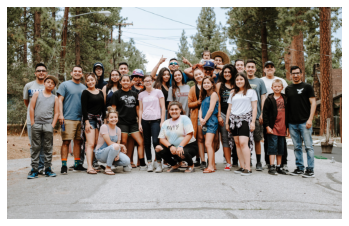

In [7]:
#โหลดภาพ
img_group = plt.imread('img_group_large.jpg')
show_image(img_group)

In [8]:
#แปลงเป็น grayscale
img_gray = cv2.cvtColor(img_group, cv2.COLOR_RGB2GRAY)

# โหลด trained classifer สำหรับตรวจจับหน้า ด้านหน้า
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

#detect หน้า
faces = face_detector.detectMultiScale(img_gray, scaleFactor=1.2, minSize=(60,60), maxSize=(120,120))

print('พบจำนวน', len(faces), 'หน้า')

พบจำนวน 22 หน้า


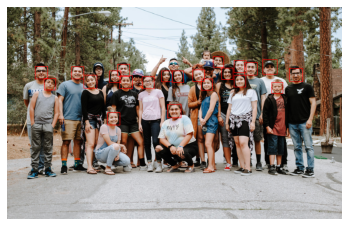

In [9]:
#แสดงสี่เหลี่ยมรอบหน้าที่เจอ
img_detected = img_group.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(img_detected, (x,y), (x+w,y+h), (255,0,0), 2)
show_image(img_detected);

In [10]:
#save รูปผล
plt.imsave('img_group_faces.jpg', img_detected)

# แบบฝึกหัด
**Face detection หน้าแมว**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

def show_image(img, title=None):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

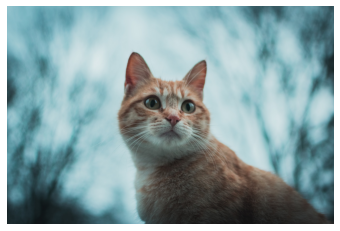

In [15]:
#โหลดรูปแมว
img_cat = plt.imread('img_cat.jpg')
show_image(img_cat)

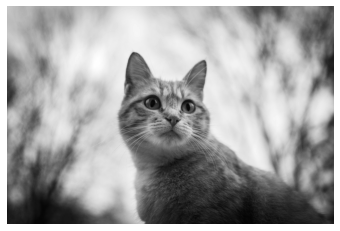

In [16]:
#แปลงเป็นภาพ grayscale
img_gray = cv2.cvtColor(img_cat, cv2.COLOR_RGB2GRAY)
show_image(img_gray) 

In [17]:
#โหลด trained classifer ที่ถูก trained มาจากรูปหน้าแมว
catface_detector = cv2.CascadeClassifier('haarcascade_frontalcatface.xml')

#detect หน้าแมว
catfaces = catface_detector.detectMultiScale(img_gray, scaleFactor=1.5, minSize=(50,50), maxSize=(800,800))
print('พบหน้าแมว', len(catfaces), 'หน้า')

พบหน้าแมว 1 หน้า


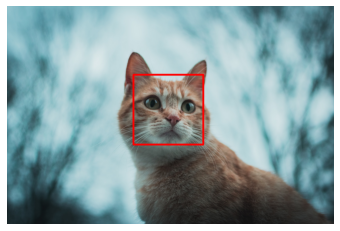

In [18]:
#แสดงกรอบสี่เหลี่ยมบนหน้าที่เจอ
img_detected = img_cat.copy()
for (x,y,w,h) in catfaces:
    cv2.rectangle(img_detected, (x,y), (x+w,y+h), (255,0,0), 10)
show_image(img_detected);

In [19]:
#save รูปผล
plt.imsave('img_cat_face.jpg', img_detected)